In [25]:
import pandas as pd
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [26]:
# df = pd.read_csv('Cust_Segmentation.csv')

In [27]:
np.random.seed(0)

In [28]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [29]:
print('X:', X)
print('y:', y)

X: [[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]
y: [1 2 2 ... 0 1 1]


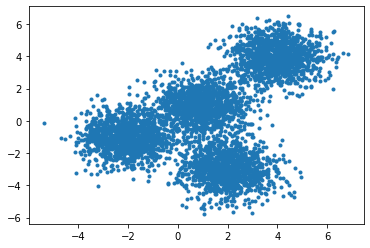

In [30]:
# Display the scatter plot of the randomly generated data !!

plt.scatter(X[:, 0],X[:, 1], marker = '.')

In [31]:
# Intialize K-means

k_means = KMeans(
    init = "k-means++", n_clusters = 4, n_init = 12)

# Now fit the K-means

k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
# let's grab the labels for each point in the model using KMeans' .labels_

k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [33]:
# also get the coordinates of the cluster centers using KMeans' .cluster_centers_

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

In [34]:
# Creating visual plot

# We have the random data generated and the KMeans model initialized, 
# Let's plot them and see what it looks like!

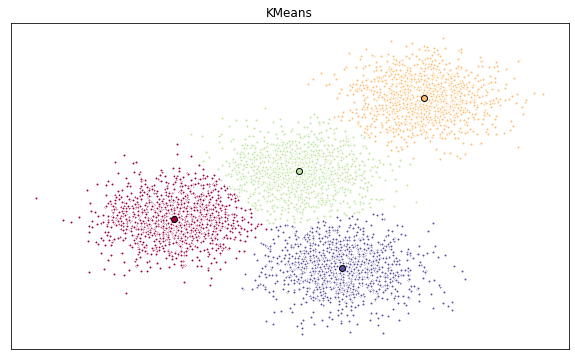

In [35]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 6))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [36]:
# Cluster the above dataset into 3 clusters.

# Previosly we've done it for 4 clusters!!

In [38]:
# Intialize K-means

k_means3 = KMeans(
    init = "k-means++", n_clusters = 3, n_init = 12)

# Now fit the K-means

k_means3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
k_means_labels = k_means3.labels_
k_means_labels

array([2, 0, 0, ..., 1, 2, 2])

In [44]:
k_means_cluster_centers = k_means3.cluster_centers_
k_means_cluster_centers

array([[ 2.0184578 , -2.94363073],
       [ 3.70310165,  3.69627302],
       [-0.80845164, -0.16933403]])

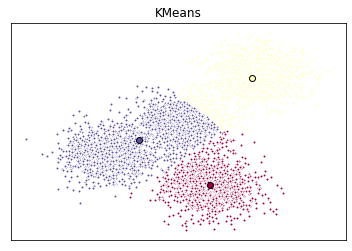

In [48]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

ax.set_xticks(())

ax.set_yticks(())

plt.show()

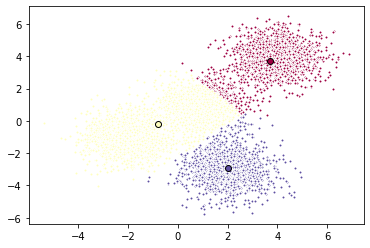

In [49]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()